# Quickstart

Once installation is complete you can start running Sarkas. This quickstart guide will walk you through
a simple example in order to check that everything is running smoothly.

The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/documentation/Tutorial_NB/input_files/yocp_cgs_pp.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/documentation/Tutorial_NB/Quickstart.ipynb)


---
## Simulation

In Jupyter notebook you can run the following commands

In [1]:
# Import the usual libraries
%pylab
%matplotlib inline
import os

plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import Simulation, PostProcess

# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'yocp_cgs_pp.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


The above commands imported the required libraries and define the file path to our input file. 

Let's now run the simulation

In [2]:
# Initialize the Simulation class
sim = Simulation(input_file_name)
# Setup the simulation's parameters
sim.setup(read_yaml=True)
# Run the simulation
sim.run()






 _______              __                
|     __|.---.-.----.|  |--.---.-.-----.
|__     ||  _  |   _||    <|  _  |__ --|
|_______||___._|__|  |__|__|___._|_____|
                                        


An open-source pure-python molecular dynamics suite for non-ideal plasmas.



* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                   Simulation                                   
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  yocp_cgs_pp
Job directory:  Simulations/yocp_cgs_pp

Equilibration dumps directory: 
 Simulations/yocp_cgs_pp/Simulation/Equilibration/dumps
Production dumps directory: 
 Simulations/yocp_cgs_pp/Simulation/Production/dumps

Equilibration Thermodynamics file: 
 Simulations/yocp_cgs_pp/Simulation/Equilibration/EquilibrationEnergy_yocp_cgs_pp.csv
Production Thermodynamics file: 
 Simulations/yocp_cgs_pp/Simulation/Prod

  0%|          | 0/10000 [00:00<?, ?it/s]


Equilibration Time: 0 hrs 0 min 59 sec

------------- Production -------------


  0%|          | 0/20000 [00:00<?, ?it/s]


Production Time: 0 hrs 2 min 10 sec

Total Time: 0 hrs 3 min 10 sec


## Postprocessing

Now that our simulation is complete we need to check if the simulation was physically sound. Run the following three lines will initialize the `PostProcess` class and calculate the observables defined in the input file.

It will also produce a plot of the Temperature and Total Energy of the Production phase. 




* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                 Postprocessing                                 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  yocp_cgs_pp
Job directory:  Simulations/yocp_cgs_pp
PostProcessing directory: 
 Simulations/yocp_cgs_pp/PostProcessing

Equilibration dumps directory:  Simulations/yocp_cgs_pp/Simulation/Equilibration/dumps
Production dumps directory: 
 Simulations/yocp_cgs_pp/Simulation/Production/dumps

Equilibration Thermodynamics file: 
 Simulations/yocp_cgs_pp/Simulation/Equilibration/EquilibrationEnergy_yocp_cgs_pp.csv
Production Thermodynamics file: 
 Simulations/yocp_cgs_pp/Simulation/Production/ProductionEnergy_yocp_cgs_pp.csv


==================== Radial Distribution Function ==================== 

Data saved in: 
 Simulations/yocp_cgs_pp/PostProcessing/RadialDistributionFunction/Production/RadialDistri

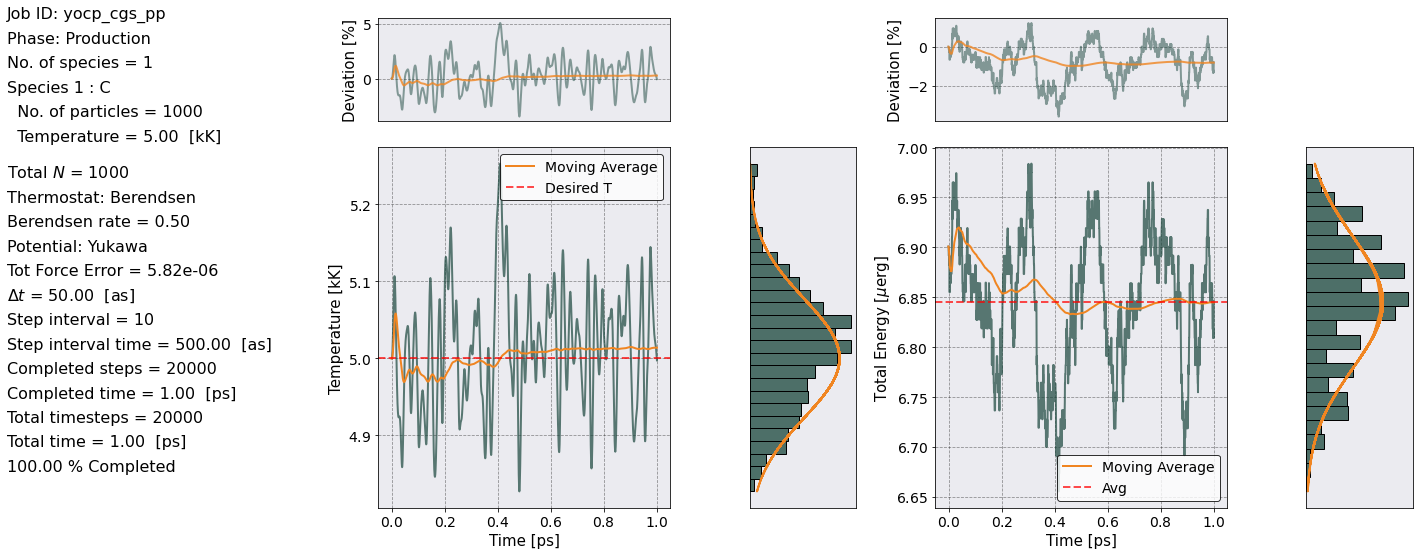

In [3]:
# Initialize the Postprocessing class
postproc = PostProcess(input_file_name)
# Read the simulation's parameters and assign attributes
postproc.setup(read_yaml=True)
# Calculate observables
postproc.run()

You will notice that both the energy and temperature oscillates wildly. This is fine as long as the percentage deviations, in the top plots, are small. You should have a temperature deviations between -2% to ~ 4-5% while energy deviations between -2% and 1%.

---
### Observables

The most common observable is the radial distribution function. This was calculated by `postproc.run()`, here we plot it by rescaling the x axis by the Wigner-Seitz radius $a_{\rm ws}$.

<AxesSubplot:xlabel='$r/a_{\\rm ws}$'>

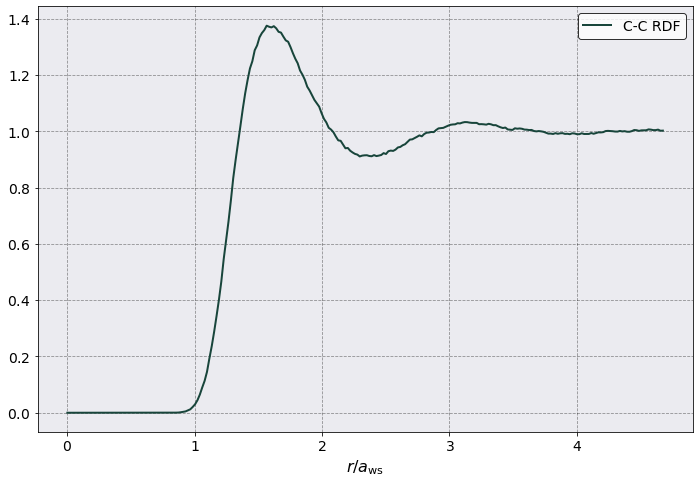

In [4]:
# Initialize the Pair Distribution Function class
postproc.rdf.plot(scaling=postproc.parameters.a_ws, xlabel = r'$r/a_{\rm ws}$')

Things to check in here are: 

* Does $g(r)$ go to 1 for large $r$ values ?
* Is there a peak at $r \sim ~1.5 a$ ?
* Is the height of this peak about ~ 1.4?

If the answer to all these question is yes than the simulation was successfull.